In [22]:
import pandas as pd

In [23]:
from sklearn.datasets import load_iris

In [24]:
iris = load_iris()

In [25]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [26]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [27]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
df['target'] = iris.target

In [29]:
df['flower_name']= df.target.apply(lambda x: iris.target_names[x])

In [30]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [31]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['target','flower_name'],axis = 1),df.target,test_size = .2,random_state = 10)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
model = RandomForestClassifier(n_estimators=20)

In [56]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
model.score(x_test,y_test)

1.0

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
y_predicted = model.predict(x_test)

In [61]:
cm = confusion_matrix(y_test,y_predicted)

In [62]:
cm

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]])

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

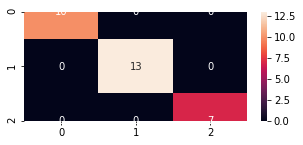

In [73]:
plt.figure(figsize=(5,2))
plt.xlabel('Predicted')
plt.ylabel('Truth')
sn.heatmap(cm,annot = True)